Importamos las librerias

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

import numpy as np
from keras import layers, models
from keras.datasets import reuters
from sklearn.model_selection import train_test_split
from keras import regularizers

Creacion de los datasets

In [ ]:
x , y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

rng = np.random.RandomState(2)
x +=1 * rng.uniform(size = x.shape)
lineary_separable = (x , y)

datasets = [lineary_separable,
            make_moons(noise=0.1),
            make_circles(noise = 0.1, factor = 0.5) ]

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

fig = plt.figure(figsize=(9,3))
h = 0.02

1953/1953 [==============================] - 2s 1ms/step


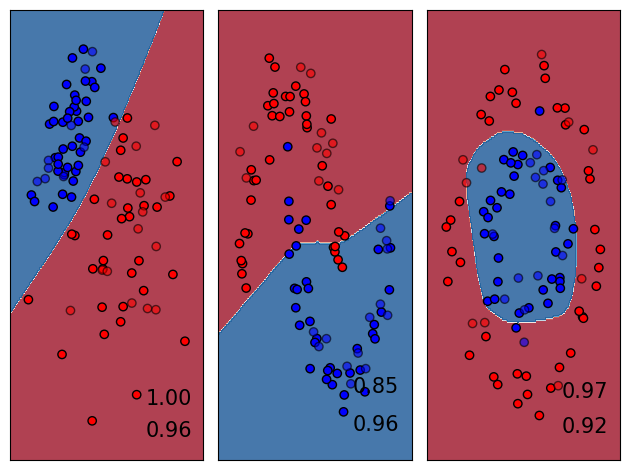

In [26]:
history_results = []
for i, ds in enumerate(datasets):
    ax = plt.subplot(1, 3, i+1)
    x, y = ds
    x = StandardScaler().fit_transform(x)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)
    # Creamos y ajustamos el modelo
    model = models.Sequential()
    model.add(layers.Dense(100, activation='relu', input_dim=xtrain.shape[1]))
    model.add(layers.Dense(units=1, activation='sigmoid'))


    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

    history_results.append(model.fit(xtrain, ytrain,
                             epochs=100,
                             batch_size=32,
                             verbose=0,
                             validation_data = (x_val, y_val)))

    score_train = model.evaluate(xtrain, ytrain, verbose=0)[1]
    score_test = model.evaluate(xtest, ytest, verbose=0)[1]

    # Dibujo de las regiones de decisión
    xmin, xmax = x[:, 0].min()-0.5, x[:, 0].max()+0.5
    ymin, ymax = x[:, 1].min()-0.5, x[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                         np.arange(ymin, ymax, h))

    # Obtener las probabilidades de predicción para cada clase
    y_pred_prob = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convertir las probabilidades en clases predichas
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Reshape para que tenga la misma forma que xx
    zz = y_pred.reshape(xx.shape)


    ax.contourf(xx, yy, zz, cmap=cm, alpha=0.8)

    # Dibujamos los puntos de entrenamiento y prueba
    ax.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap=cm_bright, edgecolors='k')
    ax.scatter(xtest[:, 0], xtest[:, 1], c=ytest, cmap=cm_bright, edgecolors='k', alpha=0.6)

    # Configuramos los límites de los ejes y las etiquetas
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([])
    ax.set_yticks([])

    # Añadimos los textos con el puntaje de entrenamiento y prueba
    ax.text(xmax - 0.3, ymin+0.7, '{:.2f}'.format(score_train), size=15, horizontalalignment='right')
    ax.text(xmax - 0.3, ymin+0.3, '{:.2f}'.format(score_test), size=15, horizontalalignment='right')


plt.tight_layout()
plt.show()


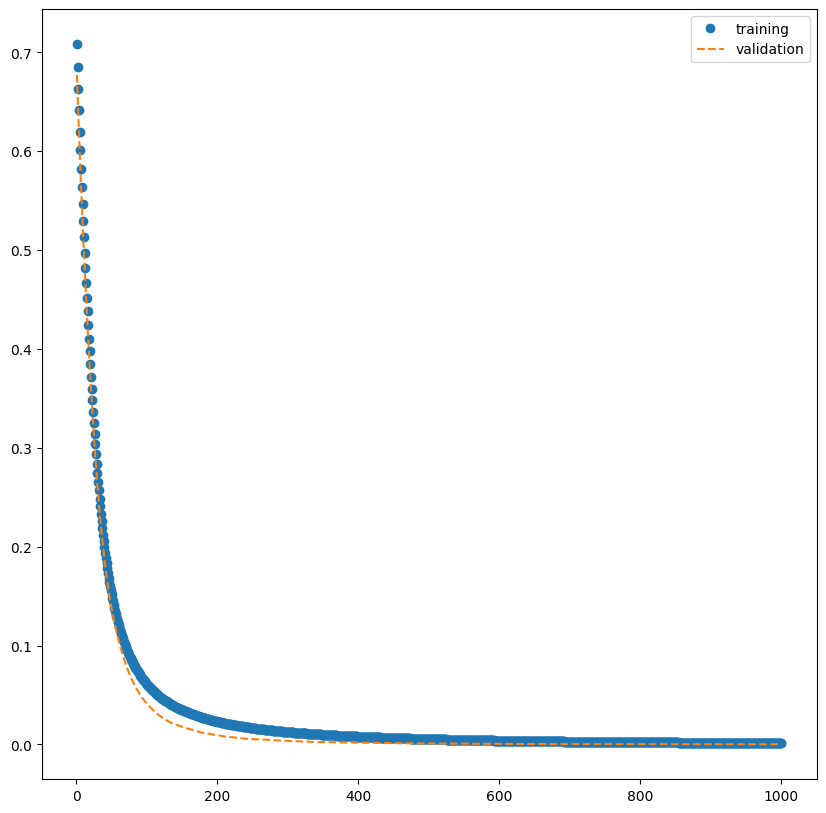

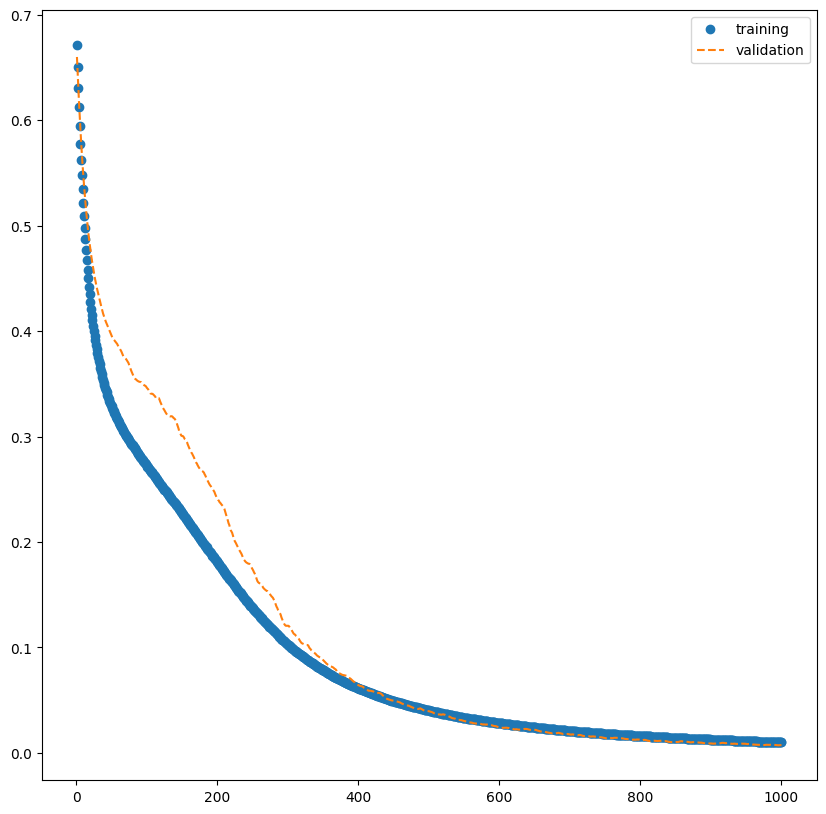

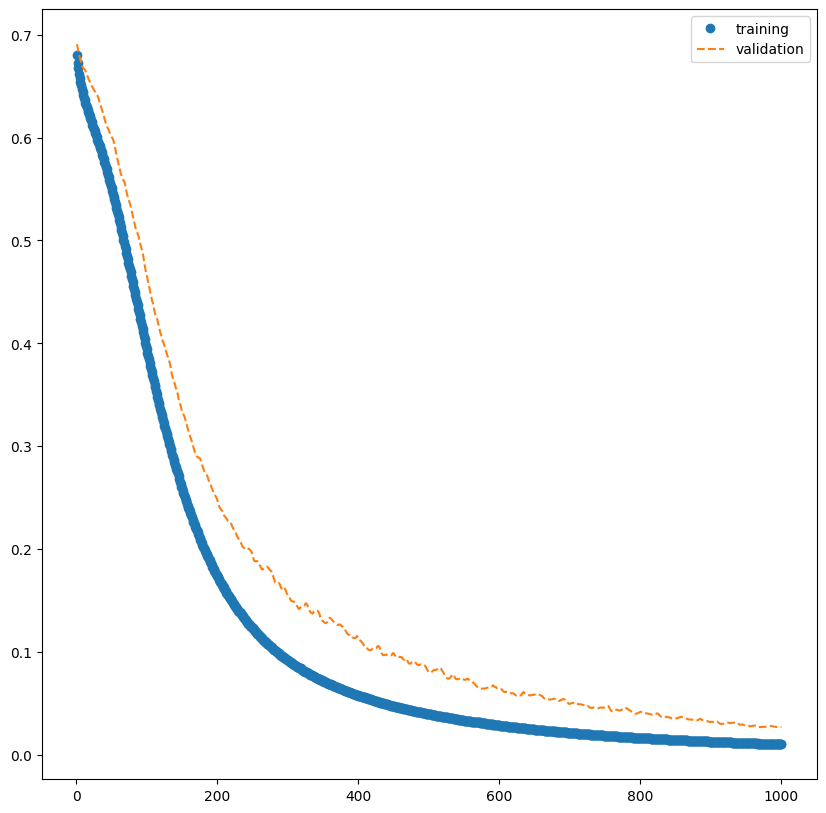

In [25]:
for history in history_results:
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  fig = plt.figure(figsize = (10,10))
  epoch = range(1, len(loss_values) + 1)
  plt.plot(epoch, loss_values, 'o', label = 'training')
  plt.plot(epoch, val_loss_values, '--', label = 'validation')
  plt.legend()
  plt.show()